In [1]:
# Execute before using this notebook if using google colab

kernel = str(get_ipython())

if 'google.colab' in kernel:    
    !wget https://raw.githubusercontent.com/fredzett/rmqa/master/utils.py -P local_modules -nc 
    !npx degit fredzett/rmqa/data data
    import sys
    sys.path.append('local_modules')

In [2]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import math
from utils import plot_line, plot_bar, plot_step, plot_hist, plot_density

# Why probability 

In **probability** we assume a data generation process by which we "create" data. In short:

- we know a model
- we generate data using this model

In **statistical inference** we do the opposite. 

- we have data
- we want to learn about the data generation process, i.e. what is the model?

Often **quantitiatve research** deals with data with the goal to infer the data generation process / the model underlying the data. 

**Easy example**: coin flip.

- Probability: we assume a random process that creates us coin flip data. We could, for example, assume it is a fair coin and 

- Inference: we have coin flip data and want to infer whether or not the coin is fair

**More realistic examples**:

- what are factors affecting customers to cancel a energy contract and switch to a competitor?

- are women with equal qualifications more likely to receive less salary 

It is, therefore, important that we have a good understanding of **probability** and **probability distributions** when conducting data analysis and infering from data. 

The following section will therefore briefly repeat$^*$ several basic and important concepts. Once we have done so we will be able to:

1. deal with uncertainties in our analysis / data 

2. interpret our analyses and models

3. simulate data to support our data analysis

($^*$it is again assumed that you have covered basic concepts of probability in a bachelor course)

# Probability distributions

## Definition probability

(Note: this section is largely taken from Imai (2017))

**Probability** is a measure of uncertainty. There are two basic ways to interpret probability:

1. **Frequentist view**: probability represents the limit of the relative frequency with which an event of interest occurs when the number of experiments repeatedly conducted under the same conditions aproaches infinity.

2. **Bayesian view**: probability is one's subjective belief about the likelihood an event occurs.



The definition of probability requires the following three concepts:

1. **experiment**: an action or a set of actions that produce stochastic events

2. **sample space**: a set of all possible outcomes of the experiment, typically denoted by $\Omega$

3. **event**: a subset of the sample space

A **random variable** assigns a numeric value to each event of the experiment. These values represent mutually exclusive and exhausitve events, together forming the entire sample space. A **discrete random variable** takes a finite or at most countably infinite number of distinct values, whereas a **continuous random variable** assumes an uncountably infinite number of values. 

Once we define a random variable, we can formalize a **probability model** using the distribution of the random variable. 

Examples of **discrete** random variables:

| Experiment                       | Random variable ($x$)           | Possible values for random variable |
|----------------------------------|---------------------------------|-------------------------------------|
| Contact five customers           | # of customers placing an order | $0, 1, 2, 3, 4, 5$                    |
| Inspect a shipment of 10 iPhones | # of defective devices     | $0, 1, 2, \cdots, 9, 10$                   |
| Operate a theme park for one day | # of customers             | $0, 1, 2,\ldots$                        |
| Sell a laptop                    | Gender of customers             | $0$ if female, $1$ if male              |

Examples of **continous** random variables:

| Experiment                  | Random variable ($x$)                             | Possible values for random variable |
|-----------------------------|---------------------------------------------------|-------------------------------------|
| Operate a McDonald's        | Time between customer arrivals in minutes         | $x \geq 0$                          |
| Fill a coffee mug           | Number of ml                                      | $0 \leq x \leq 500ml$               |
| Construct a new library     | Percentage of project complete after six months   | $0 \leq x \leq 100$                 |
| Test a new chemical process | Temperature when the desired reaction takes place | $-3 C^{\circ} \leq 120 C^{\circ}$   |


Let's look at some (selected) important distributions.

## Characterization of probability distributions

There are two important functions which are helpful in characterizing probability distributions:

1. Probability mass / density function

3. Cumulative distribution function

### Probablity mass / density function

Probablity mass funtion (**PMF**): a function that gives the probability that a discrete random variable is exactly equal to one value $x$. 

Example:

![two dice](https://www.dropbox.com/s/cefh5nkkurvdj6o/Two_dice.png?dl=1)

Note that the sum of all bars must equal to 1 given the probability of all events occuring must be equal to 1. 

Probability density function (**PDF**): a function that specifies the probability of a continous random variable falling within a particular range of values (given the probabiltiy of a continuous random variable is zero)

Example:

![normal_dist](https://www.dropbox.com/s/7dnwhb1m03w7spo/Normal_distribution.png?dl=1)

In summary, probability mass / density functions are:

- defined for any outcome of an experiment ($x$); (or range of $x$)

- assign a probability to every possible $y$ 

- a function $f(x)$ such that:

    - $f(x) \geq 0$ for any $x$ 
    
    - discrete: $x$: $\sum_{\text{all x}} f(x) = 1$;(sum of the heights is equal to 1)
    
    - continous: $\int_{-\infty}^{\infty} f(x)dx = 1$; (area under the curve is equal to 1)

### Cumulative distribution function

Unlike the PMF the CDF gives you the probability that a random variable less than or equal $x$. 

For a **discrete** distribution the CDF can be written as:

$$F(x) = \sum_{i=0}^x f(i)$$

for a discrete distribution the CDF is a step function where the function is flat and then jumpys ate each nonnegative integer value.

Here is an example of the cumulative distribution function of the binomial distribution with $n=5$ and $p=0.5$


![cdf_binomial](https://www.dropbox.com/s/0o2qdq9yax9vesw/Binomial_cdf.png?dl=1)

The horizontal axis is the allowable domain for the given probability function. Given the vertical axis is a probability, it must fall between 0 and 1. It increases from zero to one as we go from left to right on the horizontal axis.


For a **continous** distribution the CDF can be expressed as:

$$F(x) = \int_{-\infty}^{x} f(t)dt$$

Here is an example of the cumulative distribution function of the normal distribution with $\mu=0$ and $\sigma=1$:

![cdf_normal](https://www.dropbox.com/s/4ccp1rpm4bf4cpe/Normal_cdf.png?dl=1)

## Selected distributions

### Binomial distribution

Binomial outcomes are important to model, since they represent, inter alia, fundamental decisions such as stay or switch, buy or don't buy


With a binomial distribution we mean a random variable $X$ where:

$X$ = The number of outcomes $y$ in $n$ binomial experiment

Recall that a **binominal experiment** exhibits the following properties:

1. The experiment consists of a sequence of $n$ identical trials
2. Two outcomes are possible on each trial (success, failure)
3. The probablity of a success, denoted by $p$, does not change from trial to trial (also the probability of failure - $1-p$ - does not change)
4. The trials are independent


#### Probability mass function

The *probabilty mass function* of a binomial random variable $x$ with probability $p$ and $n$ trials is given by:

$$f(x) = P(X = x) = \binom{n}{x}p^x(1-p)^{n-x}$$


Recall that the binominal coefficient is defined as: $$\binom{n}{x} = \frac{n!}{x!(n-x)!}$$

Example: assume we flip a coin 5 times. How many different combinations are there to get 2 heads out of 5 flips?

- HHTTT
- HTHTT
- HTTHT
- HTTTH
- THHTT
- THTHT
- THTTH
- TTHHT
- TTHTH
- TTTHH

There are $10$ unique ways to receive 2 heads out of 5 flips. This can be calculated by:

\begin{equation}
    \binom{5}{2} = \frac{5!}{2!(5-2)!} = 10
\end{equation}

**Example**: Binomial distribution

We are a producer of lawn mow roboters. In the next month we are required to produce $100$ robots. Over the last couple of years the defect rate was 5%.


**Question:** What is the probability of producing 

1. **$0$** defective robots next month?

2. **$100$** defective robots next month?

3. **$5$** defective robots next month?

**Probablity of $0$ or $100$ defects**

For the edge cases $0$ and $100$ it is easy to come up with the solution as these are single events that either occur or do not occur. 

In [3]:
p_0 = 0.05**0 * (1-0.05)**100
p_0

0.0059205292203339975

In [4]:
p_100 = 0.05**100 * (1-0.05)**0
p_100

7.888609052210162e-131

**Probablity of exactly $5$ defects**

There are many combinations how 5 defects could occur. It could be the first 5 robots or the last 5 robots or many other any other combination of 5 robots out of 100. Therefore, we need the binomial coefficient $\binom{n}{x}$. 

In Python this can be done as follows:

In [5]:
n = 100
x = 5
n_combs = math.comb(100,5)
print("There are", n_combs, "combinations to encounter 5 defects in 100 robots.")

There are 75287520 combinations to encounter 5 defects in 100 robots.


We can easily put the definition of the probability mass function into a python function:

In [6]:
def binom_pmf(n,x,p):
    'Probablity mass function for binomial random variable'
    return math.comb(n,x) * p**x * (1-p)**(n-x)

In [7]:
n = 100
x = 5
p = 0.05
binom_pmf(n,x,p)

0.1800178272704284

The probability that 5 out of 100 robots produced are defective is $~18\%$. 

---

Let's see what the probability mass function for all possible outcomes looks like for our experiment. 

We can use this function to calculate the probabilities for all other possible events.

In [8]:
outcomes = np.arange(0,101,1) # 0 to 100 defects are possible events
probs = np.empty(n+1)
for i, x in enumerate(outcomes):
    probs[i] = binom_pmf(n,x,p)

In [9]:
probs[0], probs[5], probs[-1] # check if results match our previous results

(0.0059205292203339975, 0.1800178272704284, 7.888609052210162e-131)

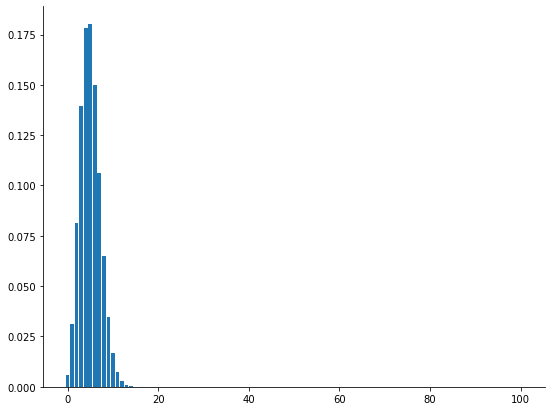

In [10]:
plot_bar(outcomes, probs);

#### Cumulative distribution function

The cumulative distribution function of a binomial random variable $x$ with probability $p$ and $n$ trials can be written as:

$$F(x) = P(X \leq x) = \sum_{k=0}^{x}\binom{n}{k}p^k(1 - p)^{n-k}$$



As you can see this is the sum of the PMFs. 

**Example**: 

We are a producer of lawn mow roboters. In the next month we are required to produce $100$ robots. Over the last couple of years the defect rate was 5%.


**Question:** What is the probability of producing 

1. less than $5$ defective robots next month?


In [11]:
x = 5
probs[:x]

array([0.00592053, 0.03116068, 0.08118177, 0.13957568, 0.17814264])

In [12]:
# Probability of less than 5 defects
sum(probs[:x]) 

0.43598130068571006

----

Let's plot the CDF for our problem:

We can easily do this by taking the cumulative sum of the probabilities (use `np.cumsum`)

In [13]:
# Example of np.cumsum
data = np.array([1,2,3,4,5])
np.cumsum(data)

array([ 1,  3,  6, 10, 15])

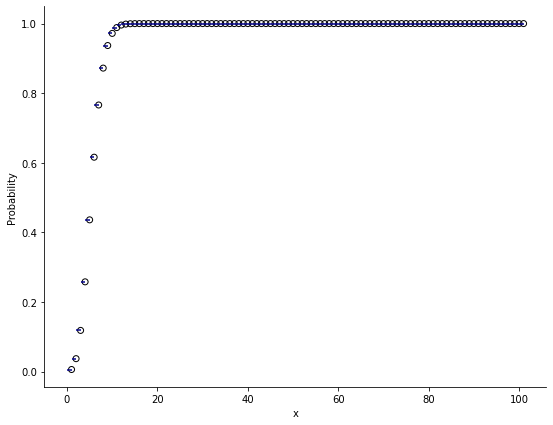

In [14]:
cum_probs = np.cumsum(probs)
plot_step(outcomes,cum_probs, xlabel="x", ylabel="Probability");

#### Mean and variance of binomial distribution

How many defective parts do we expect when producing $100$ lawnn robots?

For one production unit we do expect $5\%$ defective part; in $n = 100$ production units we, therefore, expect $n\times0.05=5$ defective parts. 

The **mean** of a binomial distribution is, therefore,  defined as:

$$E(x) = n p$$

The **variance** of a binomical distribution is defined as:

$$np(1-p)$$

Let's calculate the mean and variance for our example:

In [15]:
# mean
mu = n*p
mu

5.0

In [16]:
var = n*p*(1-p)
var

4.75

#### Using `scipy.stats` for probability distributions

So far we have implemented both pmf and cdf from scratch to illustrate the key idea of 

- the binomial distribution and

- the ways how to implement these ideas directly into python

From now on we will use existing modules to help us with probablity distribution (and simulation).

Using `scipy.stats` module it is even easier to calculate the key characteristics of probability distributions

We only need to:

1. indicate which probability distribution we need

2. call the `pmf` or `cdf` function or

3. call `mean` and `var`/`std` functions



Let's recalculate our lawn robot example using `scipy.stats`

In [17]:
import scipy.stats as stats

In [18]:
n = 100
p = 0.05
bdist = stats.binom(n,p) # specify probability distribution with n=100 and p=0.05

What is the probability of

- exactly $5$ defects

- less than $5$ defects

In [19]:
bdist.pmf(5)

0.18001782727043672

In [20]:
bdist.cdf(5)

0.6159991279561405

We can apply `pmf` and `cdf` on multiple x if we want to

In [21]:
xs = np.arange(0,n+1)
probs = bdist.pmf(xs)

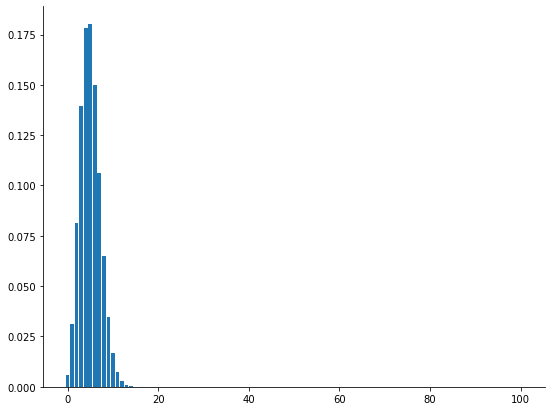

In [22]:
plot_bar(xs,probs);

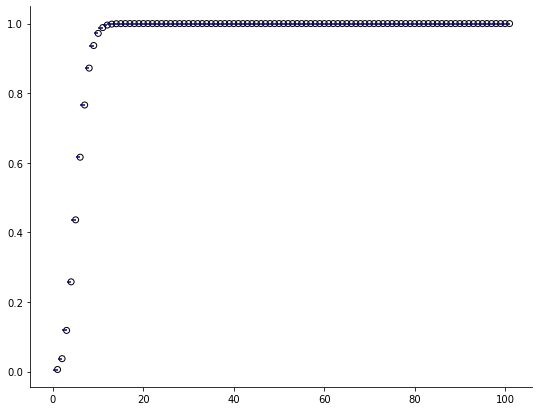

In [23]:
cum_probs = bdist.cdf(xs)
plot_step(xs,cum_probs);

Calculating mean and variance of our binomial distribution is easy:


In [24]:
bdist.mean(), bdist.var()

(5.0, 4.75)

### Poisson distribution

Another example for a discrete probability distribution is the **poisson probability distribution**. 

It is very useful when describing or estimating number of occurences over a specified interval of time or space. 

Examples:

- visitors viewing a website during one hour (over time)
- cars arriving at a car wash in a day (over time)
- the number of leaks in 250km of pipeline (over space)

If the following two properties are satisfied 

1. the probability of occurence is the same for any two intervals of equal length

2. the occurence or non-occurence in any interval is independent of the occurence or non-occurence in any other interval

the number of occurences is a random variable which can be described by a **poisson probability distribution**.

#### Probability mass function

The probability mass function (PMF) can be defined as follows:

$$P(X = k) = \frac{\lambda^ke^{-\lambda}}{k!}$$

where:  
$e = $ Euler's number (i.e. $2.71828\ldots$ )  
$k = $ the number of occurences  
$\lambda = $ the expected value (or mean) number of occurences in an interval



**Example**: consider a coffee shop in the morning. In order to set up our staffing, we are interested in the number of customers arriving during an $5$ minutes period in the morning. Let's assume that the number of customers arriving at our coffee shop follows a poisson process, i.e. 

- we assume that the probability of a customer arriving is the same for any two time intervals of equal length (during that $5$ minutes)

- we assume that the arrival of customers during the $5$ minute period is independent of each other. 

From previous experience we know that average number of customers arriving during that $5$ minute time period is $7$. 

We can now calculate the probability of $k$ customers arriving as follows:

$$P(X=k) = \frac{7^ke^{-7}}{k!}$$

E.g. the probability of only $4$ customers arriving in $5$ minutes is $P(4) = \frac{7^{4}e^{-7}}{4!} \approx 9.12\%$

In [4]:
mu = 7 # lambda (note that lambda is a special keyword in python and should not be used)
poisson = stats.poisson(mu)
poisson.pmf(4)

0.09122619163734964

Using `scipy.stats` we can now calculate the entire probability mass function, easily. 

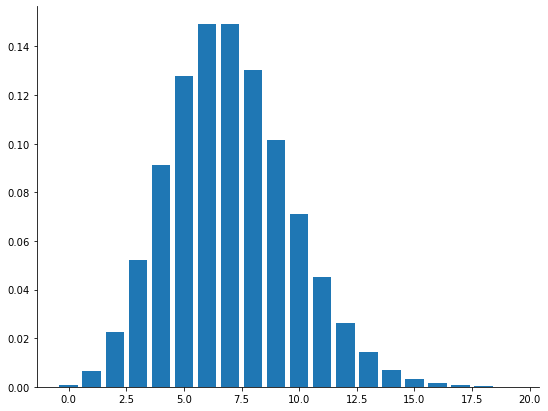

In [5]:
x = np.arange(0,20)
probs = poisson.pmf(x)
plot_bar(x, probs);

#### Cumulative distribution function

As with the binomial distribution there is no distinct expression for the cumulative poisson distribution. Instead is also given simply be the sum of the probability mass functions:

$$P(X \leq k) = \sum_{x=0}^k \frac{\lambda^ke^{-\lambda}}{k!}$$

**Example**: the probability for 0 to 3 (inculding) customers arriving is $P(X=0) + P(X=1) + P(X=2) + P(X=3) \approx 8.18\%$

In [6]:
poisson.cdf(3)

0.0817654162447216

The CDF of a Poission distribution is then also a step function. 

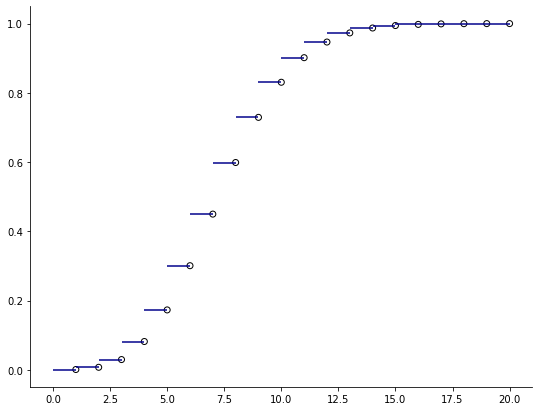

In [7]:
probs = poisson.cdf(x)
plot_step(x,probs);

#### Mean and variance of distribution

The mean and the variance of the distribution are both given by

$$E(X) = Var(X) = \lambda$$

In [8]:
poisson.mean(), poisson.var()

(7.0, 7.0)

### Normal distribution

Arguably one of the most important and known examples of a continous distribution is the *normal distribution* (often also called the *gaussian normal distribution*). It can be considered a *special* distribution because, as it's name implies, the sum of random variables from a given (non-normal) distribution tend to follow the normal distribtion.

The normal distribution has many practical applications as many random variables are following normal distributions, e.g.:

- heights, weights and IQ of people
- students test scores
- amounts of rainfall
- stock returns (although with fat tails)

It is also an important probability distribution for many aspects in statistical inference. 

A normal random variable can take any number on the real line $(-\infty, \infty)$. Note that the probability for any single value from a continuous distribution is zero. This is because the probability of getting a value of exactly 3.45 in on the real line $(-\infty, \infty)$ is zero. Therefore think of a value $x$ an infinitesimal small range around $x$. 

#### Probability density function

The probability density function (pdf) is defined as follows:

$$f(x) = \frac{1}{\sqrt{2\pi\sigma}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$

where:

$\mu =$ is the mean of the distribution  
$\sigma =$ the standard deviation of the distribution

We can model these distributions using `scipy.stats.norm`. Calculating the densities (not probabilities) of $x$ can then be calcualted using `pdf` (not pmf!).

Here are three different normal distributions with different means and standard deviations

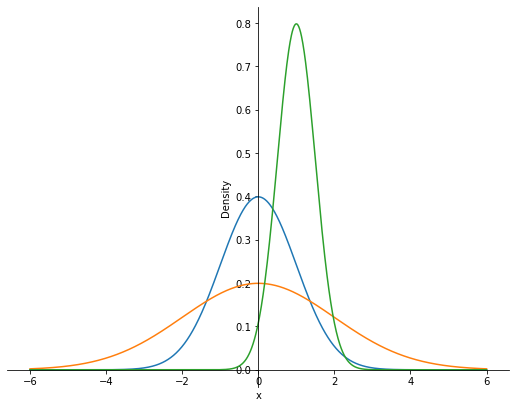

In [104]:
standard = stats.norm(0,1)
flat = stats.norm(0,2)
steep = stats.norm(1,0.5)
densities = [c.pdf(x) for c in [standard, flat, steep]]

x = np.linspace(-6,6,1000)
plot_line(x,densities , xlabel="x", ylabel="Density", zero_origin=True);

**Example**: let's say the height of humans can be described as a normal random variable (in cm).

- height of males can be described as a random normal variable with $\mu =  170$ and $\sigma = 20$ 

- height of women can be described as  random normal variable with $\mu =  160$ and $\sigma = 18$ 

In [105]:
men = stats.norm(170,25) 
women = stats.norm(160,18)

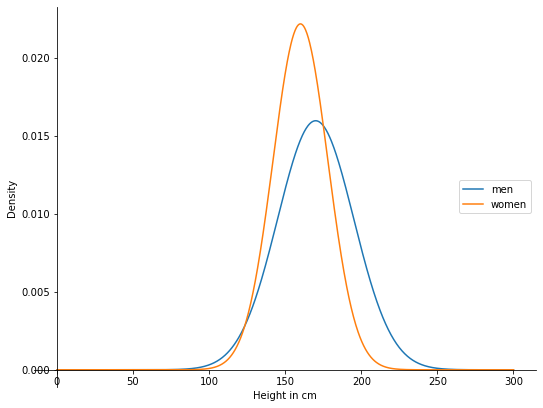

In [134]:
x = np.linspace(0,300, 1000)
y_men = men.pdf(x)
y_women = women.pdf(x)
_, ax = plot_line(x,[y_men, y_women], xlabel="Height in cm", ylabel="Density");
ax.legend(["men", "women"], loc="right" );

#### Cumulative distribution function

The cumulative probability distribution (CDF) has no analytically tractable form is given by:

$$F(x) = P(X \leq x) = \int_{-\infty}^x \frac{1}{\sqrt{2\pi\sigma}}e^{-\frac{(x-\mu)^2}{2\sigma^2}} dt$$

It represents the area under the PDF from $-\infty$ up to $x$.

**Let's continue our example:**

- what is the probability of women being smaller or equal  to 1,40m?

- what is the probability of men being larger than 2m?

In [109]:
women.cdf(140)

0.13326026290250537

In [110]:
1 - men.cdf(200)

0.11506967022170822

We can plot the cumulative probability distribution by

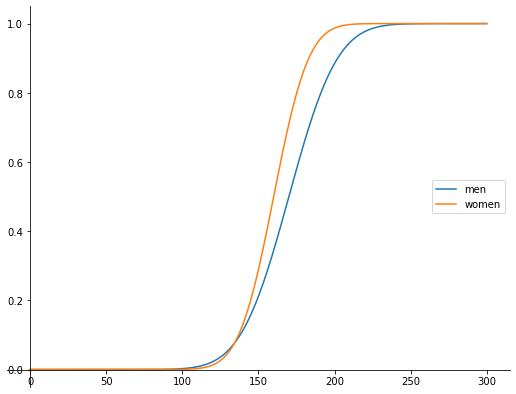

In [133]:
cdf_men = men.cdf(x)
cdf_women = women.cdf(x)

_, ax = plot_line(x,[cdf_men, cdf_women]);
ax.legend(["men", "women"], loc="right" );

## Approximation of distributions

It is important to note that many distributions can be approximated with different distributions if certain properties hold. 

We will look at the following three approximations:

- binomial distribution approximated by normal distribution
- binomial distribution approximated by poisson distribution
- poisson distribution approximated by normal distribution

### Approximation: binomial distribution through normal distribution

If the following condition holds:

- $n$ is sufficiently large
- $p$ not to close to the edges $0$ or $1$

than a binomial distribution can be approximated by a normal distribution, where:

- $\mu = np$
- $\sigma = \sqrt{np(1-p)}$

**Example**

In [79]:
n = 100
p = 0.5
x = np.arange(0,n)
y_binom = stats.binom(n,p).pmf(x)

mu = n*p
sig = np.sqrt(n*p*(1-p))
y_norm = stats.norm(mu,sig).pdf(x)


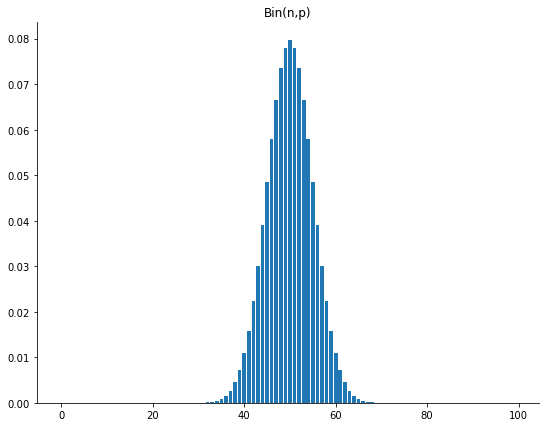

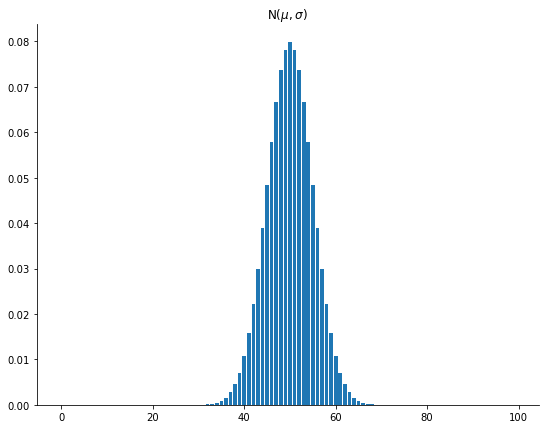

In [80]:
plot_bar(x,y_binom, title="Bin(n,p)");
plot_bar(x,y_norm, title=r"N($\mu, \sigma$)");

### Approximation: binomial distribution through poisson distribution

If the following condition holds:

- $n$ is sufficiently large
- $p$ is sufficiently small

than a binomial distribution can be approximated by a poisson distribution, where:

- $\lambda = np$

**Example**

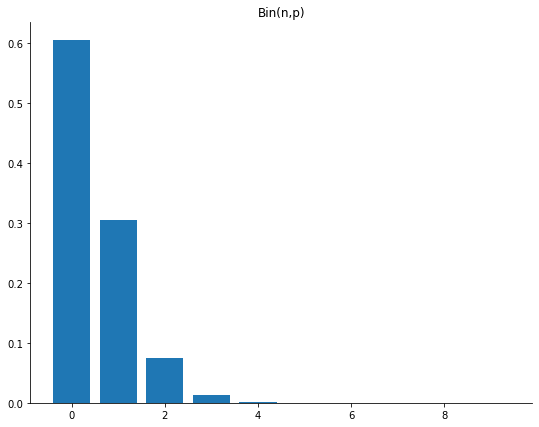

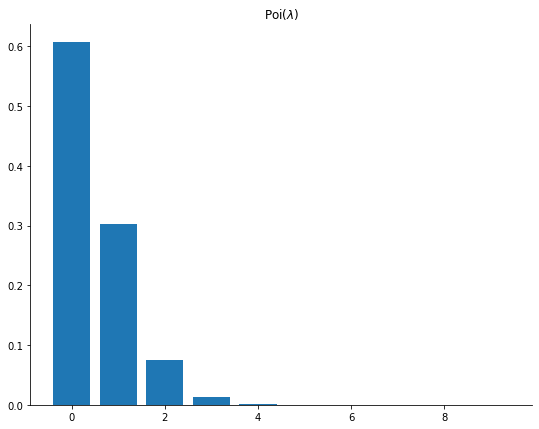

In [64]:
n = 50
p = 0.01
x = np.arange(0,10)
y_binom = stats.binom(n,p).pmf(x)


mu = n*p
y_poisson = stats.poisson(mu).pmf(x)

plot_bar(x,y_binom, title="Bin(n,p)");
plot_bar(x,y_poisson, title=r"Poi($\lambda$)");

### Approximation: poisson distribution through normal distribution

If the following condition holds:

- $\lambda$ is sufficiently large


than a poisson distribution can be approximated by a normal distribution, where:

- $\mu = \lambda$
- $\sigma = \sqrt{\lambda}$

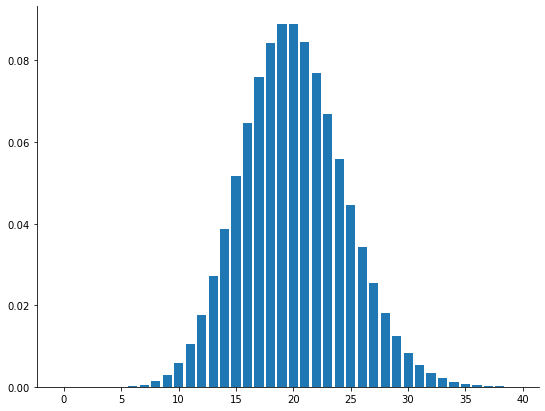

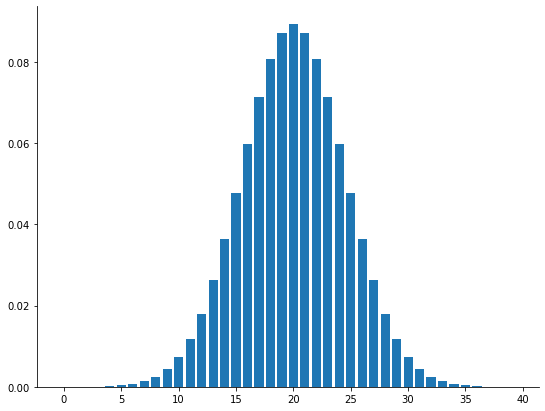

In [71]:
mu = 20
x = np.arange(0,20*2)
y_poisson = stats.poisson(mu).pmf(x)
plot_bar(x,y_poisson);

y_norm = stats.norm(mu, np.sqrt(mu)).pdf(x)
plot_bar(x,y_norm);

## Probability distributions and simulations

We have previously discussed and seen the benefits of simulation. We had stated the following (selected) use cases for simulation:

1. solve probability problems

2. calculate features of probability densities

3. understand the assumed data generation process

4. evaluating estimators

We can draw random samples from a distribution and then investigate that sample to learn something about the features of a distribution. Also we can use these random samples to simulate real world problems. 

Using `scipy.stats` we can define distributions and than use `rvs` to draw random samples from this distribution. 

Example:

In [37]:
n = 10_000
norm = stats.norm(48,3)
smpl = norm.rvs(n)
len(smpl), smpl # holds n values from N(48,3)

(10000,
 array([53.31160878, 44.91086443, 49.86986467, ..., 45.27537628,
        46.34223655, 48.67411836]))

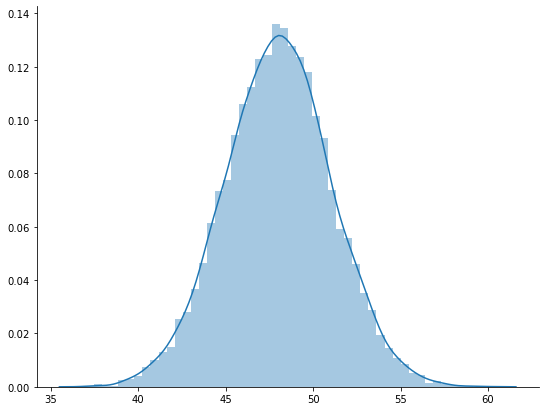

In [38]:
plot_density(smpl);

In [39]:
# Calculate features on distribution: e.g. quantiles
np.quantile(smpl,[0,0.25,0.5,0.75, 1])

array([37.00421047, 45.96689588, 48.02208112, 50.02454335, 60.08643583])

array([7.05440448e-05, 2.51608228e-01, 5.00412486e-01, 7.50495940e-01,
       9.99910505e-01])

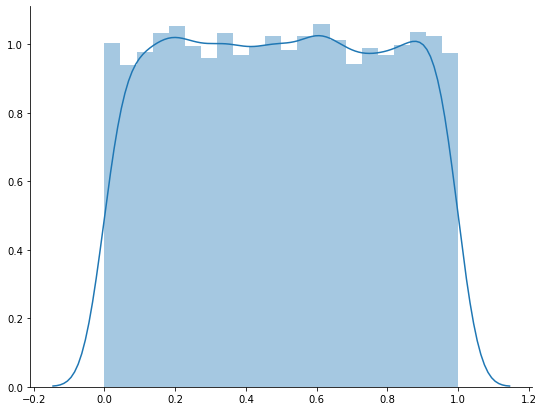

In [40]:
# Different distribution (uniform continuous between 0 and 1)
uni = stats.uniform()
smpl = uni.rvs(10000)
plot_density(smpl);
np.quantile(smpl,[0,0.25,0.5,0.75, 1])

### Creating synthetic data

We can use this to generate (synthetic) data sets to test our models on. 

Example: let's create a linear data set.

$$y = \beta_0 + \beta_1x + \epsilon$$

If we synthetically create this data we can run regression models on this data and know the ground truth. This is very helpful when trying to understand the specifics of a model and to see which modells work well on which kind of data.

Let's make the following assumptions:

- $x$ is a random poisson variable with $\lambda = 5$.
- $\beta_0=10$ and $\beta_1 = 4.5$
- $\epsilon$ is N(0,1) by definition

In [109]:
n = 1000
x = stats.poisson(5).rvs(n)
b0, b1 = 10, 4.5
eps = stats.norm().rvs(n)
y = b0 + b1*x + eps

In [110]:
lreg = stats.linregress(x,y)
lreg.intercept, lreg.slope

(10.054498698001467, 4.494560243572673)

We can see that if our research data is expected to be distributed as defined a simple linear regression model would work really well. 

### [ADVANCED] Simulating real world problems

See [here](https://nbviewer.jupyter.org/github/norvig/pytudes/blob/master/ipynb/Economics.ipynb) for a great example (which also produces a counterintutive result).

A minor extract from that example is reproduced (in a slightly different fashion) below. 

In [43]:
N = 10_000 # size of population
MU = 100 # mean wealth of population

In [44]:
population = stats.norm(MU, MU/5).rvs(N)

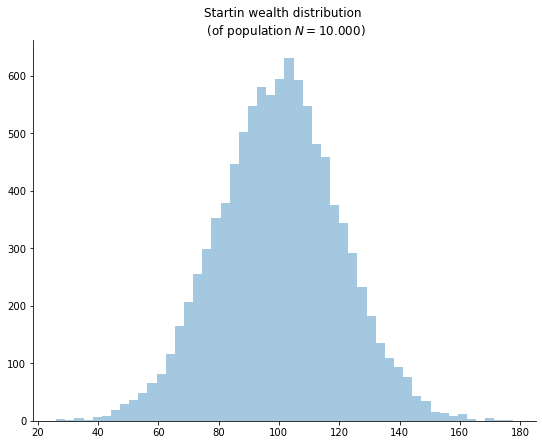

In [45]:
plot_density(population, kde=False, title="Startin wealth distribution \n (of population $N=10.000$)");

In [46]:
np.mean(population), np.std(population), np.median(population)

(100.04231291617509, 20.135020830628903, 100.3674472999617)

In [47]:
def transact(A,B):
    import random
    total = A + B
    a = random.uniform(0,total)
    return a, total - a

In [48]:
def meet(N): 
    return np.random.choice(range(N), size=2)

In [49]:
def step(population, transact, meet):
    i, j = meet(len(population))
    population[i], population[j] = transact(population[i], population[j])
    return population

In [50]:
episodes = 10000
new_pop = population.copy()
for t in range(episodes):
    new_pop =  step(new_pop, transact, meet)
sum(new_pop), sum(population)

(1000394.2542033996, 1000423.1291617521)

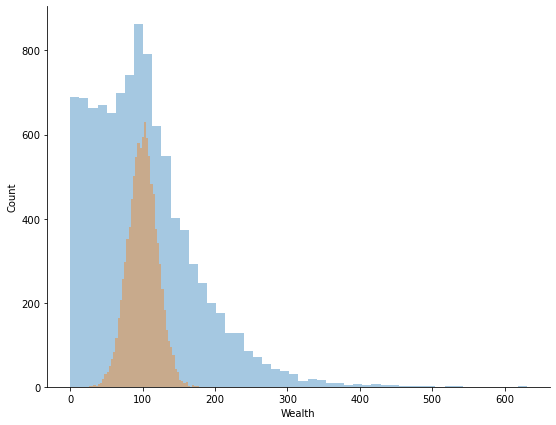

In [51]:
plot_density([new_pop, population], kde=False, xlabel="Wealth", ylabel="Count");

In [52]:
np.mean(new_pop), np.std(new_pop), np.median(new_pop)

(100.0394254203405, 70.92963231962865, 91.43513443524782)